# Lambda School Data Science - Logistic Regression

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

## Lecture - Where Linear goes Wrong
### Return of the Titanic 🚢

You've likely already explored the rich dataset that is the Titanic - let's use regression and try to predict survival with it. The data is [available from Kaggle](https://www.kaggle.com/c/titanic/data), so we'll also play a bit with [the Kaggle API](https://github.com/Kaggle/kaggle-api).

In [184]:
!pip install pystan

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 50.0MB 177kB/s 


In [25]:
kaggle_config = json.loads(open("../kaggle.json").read())
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [38]:
os.chdir('../data/titanic')

In [ ]:
!kaggle competitions download -c titanic

In [40]:
# How would we try to do this with linear regression?
train_df = pd.read_csv('train.csv').dropna()
test_df = pd.read_csv('test.csv').dropna()  # Unlabeled, for Kaggle submission

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [42]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [44]:
X = train_df[['Pclass', 'Age', 'Fare']]
y = train_df.Survived

linear_reg = LinearRegression().fit(X, y)
linear_reg.score(X, y)

0.08389810726550917

In [66]:
y_pred = linear_reg.predict(test_df[['Pclass', 'Age', 'Fare']])
y_pred

array([ 0.79543117,  0.58610823,  0.67595121,  0.793829  ,  0.62090522,
        0.72542107,  0.59848968,  0.58734245,  0.48567063,  0.77627736,
        0.84211887,  0.57052439,  0.7754689 ,  0.96621114,  0.70287941,
        0.57673837,  0.72321391,  0.75894755,  0.77968041,  0.50246003,
        0.49858077,  0.7474959 ,  0.3542282 ,  0.61648435,  0.71300224,
        0.66294608,  0.53175333,  0.77397395,  0.68419387,  0.68395536,
        0.52041202,  0.56814038,  0.79586606,  0.81372012,  0.61068545,
        0.57260627,  0.52525981,  0.58055388,  0.45584728,  0.67976208,
        0.8226707 ,  0.84286197,  0.96189157,  0.66724612,  0.68589478,
        0.61846513,  0.63455044,  0.68275686,  0.65738372,  0.45198998,
        0.59988596,  0.63845908,  0.63132487,  0.7888473 ,  0.60126246,
        0.79714045,  0.78713803,  0.54643775,  0.42823635,  0.7711724 ,
        0.53552976,  0.55608044,  0.54480459,  0.57031915,  0.65080369,
        0.77958926,  0.6371013 ,  0.70993488,  0.71493598,  0.60

In [46]:
linear_reg.coef_

array([-0.08596295, -0.00829314,  0.00048775])

In [48]:
# Rich 5-year old in first class
test_case = np.array([[1, 5, 500]])
linear_reg.predict(test_case)

array([ 1.14845883])

In [92]:
log_reg = LogisticRegression().fit(X, y)
log_reg.score(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7103825136612022

In [51]:
log_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
log_reg.predict(test_case)[0]

1

In [54]:
log_reg.predict_proba(test_case)[0]

array([ 0.02485552,  0.97514448])

In [55]:
# What's the math?
log_reg.coef_

array([[-0.0455017 , -0.02912513,  0.0048037 ]])

In [56]:
log_reg.intercept_

array([ 1.45878264])

In [57]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [58]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[ 0.97514448]])

So, clearly a more appropriate model in this situation! For more on the math, [see this Wikipedia example](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).

For live - let's tackle [another classification dataset on absenteeism](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) - it has 21 classes, but remember, scikit-learn LogisticRegression automatically handles more than two classes. How? By essentially treating each label as different (1) from some base class (0).

In [75]:
os.chdir('..')
!mkdir -p absenteeism
os.chdir('absenteeism')
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
!unzip Absenteeism_at_work_AAA.zip

--2019-02-25 18:20:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66136 (65K) [application/zip]
Saving to: ‘Absenteeism_at_work_AAA.zip’

Absenteeism_at_work 100%[===================>]  64.59K   278KB/s    in 0.2s    

2019-02-25 18:20:00 (278 KB/s) - ‘Absenteeism_at_work_AAA.zip’ saved [66136/66136]

Archive:  Absenteeism_at_work_AAA.zip
  inflating: Absenteeism_at_work.arff  
  inflating: Absenteeism_at_work.csv  
  inflating: Absenteeism_at_work.xls  
  inflating: Attribute Information.docx  
  inflating: UCI_ABS_TEXT.docx       


In [78]:
absenteeism = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [79]:
absenteeism.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## Assignment - real-world classification

We're going to check out a larger dataset - the [FMA Free Music Archive data](https://github.com/mdeff/fma). It has a selection of CSVs with metadata and calculated audio features that you can load and try to use to classify genre of tracks. To get you started:

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics, model_selection, preprocessing
from xml.etree import ElementTree
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import multiprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import os, json
import urllib

In [11]:
os.chdir('..')
!mkdir -p music
os.chdir('data/music')

In [7]:
!pwd

/Users/work/.work/src/projects/lambdaschool/unit-2/DS-Unit-2-Sprint-3-Advanced-Regression/data/music


In [64]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-02-25 17:54:21--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.13, 2001:620:5ca1:2ff::ce53
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip’

fma_metadata.zip    100%[===================>] 341.81M   555KB/s    in 11m 59s 

2019-02-25 18:06:21 (487 KB/s) - ‘fma_metadata.zip’ saved [358412441/358412441]

Archive:  fma_metadata.zip
 bunzipping: fma_metadata/README.txt  
 bunzipping: fma_metadata/checksums  
 bunzipping: fma_metadata/not_found.pickle  
 bunzipping: fma_metadata/raw_genres.csv  
 bunzipping: fma_metadata/raw_albums.csv  
 bunzipping: fma_metadata/raw_artists.csv  
 bunzipping: fma_metadata/raw_tracks.csv  
 bunzipping: fma_metadata/tracks.csv  
 bunzipping: fma_metadata/genres.csv  
 bunzipping: fma_metadata/raw_echonest.csv

#### Load Metadata

In [12]:
tracks_metadata = pd.read_csv('fma_metadata/tracks.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This is the biggest data you've played with so far, and while it does generally fit in Colab, it can take awhile to run. That's part of the challenge!

Your tasks:
- Clean up the variable names in the dataframe
- Use logistic regression to fit a model predicting (primary/top) genre
- Inspect, iterate, and improve your model
- Answer the following questions (written, ~paragraph each):
  - What are the best predictors of genre?
  - What information isn't very useful for predicting genre?
  - What surprised you the most about your results?

*Important caveats*:
- This is going to be difficult data to work with - don't let the perfect be the enemy of the good!
- Be creative in cleaning it up - if the best way you know how to do it is download it locally and edit as a spreadsheet, that's OK!
- If the data size becomes problematic, consider sampling/subsetting
- You do not need perfect or complete results - just something plausible that runs, and that supports the reasoning in your written answers

If you find that fitting a model to classify *all* genres isn't very good, it's totally OK to limit to the most frequent genres, or perhaps trying to combine or cluster genres as a preprocessing step. Even then, there will be limits to how good a model can be with just this metadata - if you really want to train an effective genre classifier, you'll have to involve the other data (see stretch goals).

This is real data - there is no "one correct answer", so you can take this in a variety of directions. Just make sure to support your findings, and feel free to share them as well! This is meant to be practice for dealing with other "messy" data, a common task in data science.

#### Fix Column Headings

In [13]:
# Fixing column names
tracks_metadata = tracks_metadata\
    .rename(columns={'Unnamed: 0': 'track_id'})\
    .rename(columns={old: new for old, new in zip(tracks_metadata.columns.values[1:], tracks_metadata.iloc[0, :][1:].values)})\
    .drop(index=[0,1])

In [14]:
tracks_metadata.columns.values

array(['track_id', 'comments', 'date_created', 'date_released', 'engineer',
       'favorites', 'id', 'information', 'listens', 'producer', 'tags',
       'title', 'tracks', 'type', 'active_year_begin', 'active_year_end',
       'associated_labels', 'bio', 'comments', 'date_created', 'favorites',
       'id', 'latitude', 'location', 'longitude', 'members', 'name',
       'related_projects', 'tags', 'website', 'wikipedia_page', 'split',
       'subset', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'], dtype=object)

#### Convert Each Column To The Appropriate Datatype

In [15]:
# Formatting dates
tracks_metadata['date_released'] = pd.to_datetime(tracks_metadata.date_released)
tracks_metadata['active_year_begin'] = pd.to_datetime(tracks_metadata.active_year_begin)
tracks_metadata['date_recorded'] = pd.to_datetime(tracks_metadata.date_recorded)

In [16]:
# Formating numeric columns
tracks_metadata.bit_rate = tracks_metadata.bit_rate.astype(np.int64)
tracks_metadata.number = tracks_metadata.number.astype(np.int64)
tracks_metadata.id = tracks_metadata.id.astype(np.int64)
tracks_metadata.comments = tracks_metadata.comments.astype(np.int64)
tracks_metadata.latitude = tracks_metadata.latitude.astype(np.float64)
tracks_metadata.longitude = tracks_metadata.longitude.astype(np.float64)
tracks_metadata.favorites = tracks_metadata.favorites.astype(np.int64)
tracks_metadata.track_id = tracks_metadata.track_id.astype(np.int64)
tracks_metadata.listens = tracks_metadata.listens.astype(np.int64)
tracks_metadata.tracks = tracks_metadata.tracks.astype(np.int64)
tracks_metadata.interest = tracks_metadata.interest.astype(np.int64)
tracks_metadata.duration = tracks_metadata.duration.astype(np.int64)

In [17]:
tracks_metadata.sample(1)

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
63222,94535,2,2013-11-06 13:41:42,2013-11-01,NaN,2,15396,<p>President John F. Kennedy was assassinated ...,31044,NaN,...,NaN,393,NaN,Attribution-NonCommercial-NoDerivatives (aka M...,294,NaN,18,NaN,[],Black Tears


#### Drop Rows Which Coincide With NaNs in the genre_top Category

In [18]:
tracks_metadata.dropna(subset=['genre_top']).shape, tracks_metadata.shape

((49598, 53), (106574, 53))

In [19]:
tracks_metadata = tracks_metadata.dropna(subset=['genre_top'])

#### Drop Columns Which Are Mostly NaNs

In [20]:
# Drop columns which are majority empty
tracks_metadata = tracks_metadata.drop(columns=tracks_metadata.columns.values[(tracks_metadata.isna().sum()/tracks_metadata.shape[0])*100 > 85])

#### Fill NaNs When The Column Is Categorical

In [21]:
# Filling empty values
tracks_metadata.engineer = tracks_metadata.engineer.fillna('Unknown')
tracks_metadata.language_code = tracks_metadata.language_code.fillna('Unknown')
tracks_metadata.license = tracks_metadata.license.fillna('None')
tracks_metadata.producer = tracks_metadata.producer.fillna('None')
tracks_metadata.title = tracks_metadata.title.fillna('None')
tracks_metadata.bio = tracks_metadata.bio.fillna('None')
tracks_metadata.type = tracks_metadata.type.fillna('None')
tracks_metadata.website = tracks_metadata.website.fillna('None')
tracks_metadata.location = tracks_metadata.location.fillna('Unknown')
tracks_metadata.members = tracks_metadata.members.fillna('Unknown')

#### Drop Dates and Coordinates

In [22]:
# Drop columns which are hard to impute
tracks_metadata = tracks_metadata.drop(columns=['date_created', 'date_released', 'active_year_begin'])
tracks_metadata = tracks_metadata.drop(columns=['latitude', 'longitude'])

#### Check for NaNs

In [23]:
tracks_metadata.isna().sum()

track_id         0
comments         0
engineer         0
favorites        0
id               0
listens          0
producer         0
tags             0
title            0
tracks           0
type             0
bio              0
comments         0
favorites        0
id               0
location         0
members          0
name             0
tags             0
website          0
split            0
subset           0
bit_rate         0
comments         0
duration         0
favorites        0
genre_top        0
genres           0
genres_all       0
interest         0
language_code    0
license          0
listens          0
number           0
tags             0
title            0
dtype: int64

In [24]:
tracks_metadata.sample(1)

,track_id,comments,engineer,favorites,id,listens,producer,tags,title,tracks,...,genre_top,genres,genres_all,interest,language_code,license,listens,number,tags,title
26326,40407,1,Unknown,0,8012,408,None,[],Aswang,2,...,Experimental,"[1, 32, 186]","[32, 1, 186, 38]",696,Unknown,Attribution-Noncommercial-Share Alike 3.0 Unit...,243,2,[],Manananggal


#### Split Out DataFrame

In [25]:
# Split the dataset
albums = tracks_metadata.loc[:, :'type'].loc[:, 'comments':]
artists = tracks_metadata.loc[:, 'bio':'website']
tracks = tracks_metadata.loc[:, 'bit_rate':]

In [26]:
albums.columns.values

array(['comments', 'engineer', 'favorites', 'id', 'listens', 'producer',
       'tags', 'title', 'tracks', 'type'], dtype=object)

In [27]:
artists.columns.values

array(['bio', 'comments', 'favorites', 'id', 'location', 'members', 'name',
       'tags', 'website'], dtype=object)

In [28]:
tracks.columns.values

array(['bit_rate', 'comments', 'duration', 'favorites', 'genre_top',
       'genres', 'genres_all', 'interest', 'language_code', 'license',
       'listens', 'number', 'tags', 'title'], dtype=object)

#### Optionally, If Dates Were Preserved, Convert Them To The Proper Datatype

In [29]:
# Formatting dates
# artists['date_created'] = pd.to_datetime(artists.date_created)
# albums['date_created'] = pd.to_datetime(albums.date_created)
# tracks['date_created'] = pd.to_datetime(tracks.date_created)

#### Assign A Type To Each Subset

In [30]:
artists['type'] = 'artist'
albums['type'] = 'album'
tracks['type'] = 'track'

#### Join The Subsets Into A MultiIndexed DataFrame

In [31]:
# Construct heirarchical dataframe
metadata = pd.DataFrame({
    (kind, column): dataframe[column] 
        for dataframe, kind in zip([artists, albums, tracks], ['artist', 'album', 'track']) 
        for column in dataframe.columns.values
})

#### Split Out Logistic Regression Labels

In [32]:
encoder = preprocessing.LabelEncoder().fit(tracks.genre_top)

In [33]:
encoder.classes_

array(['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic',
       'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',
       'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken'], dtype=object)

In [34]:
y = encoder.transform(tracks.genre_top)

#### Classify Each Track Genre According To The Track Metadata Subset

In [292]:
classifier = LogisticRegression(solver='liblinear')

X = tracks.drop(columns=['genre_top', 'genres', 'genres_all'])\
        .apply(preprocessing.LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.39459677419354838

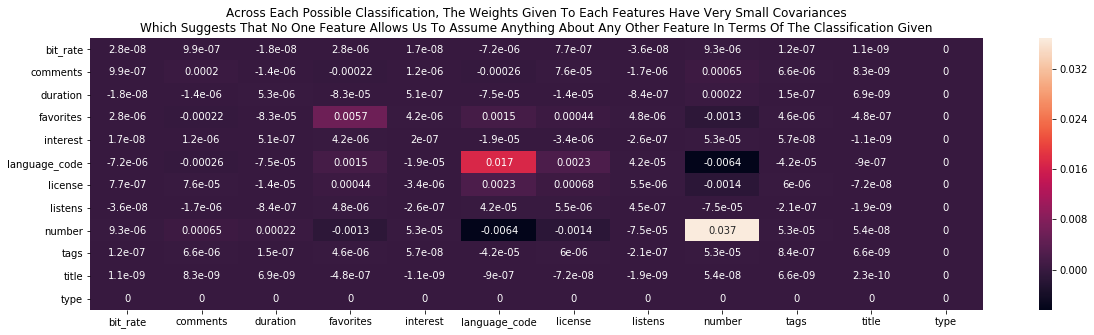

In [434]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).cov(), annot=True)

ax.set_title("Across Each Possible Classification, The Weights Given To Each Features Have Very Small Covariances\nWhich Suggests That No One Feature Allows Us To Assume Anything About Any Other Feature In Terms Of The Classification Given");

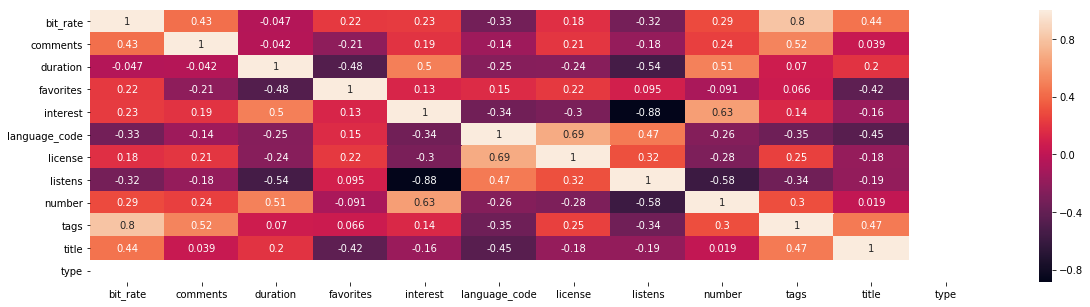

In [427]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).corr(), annot=True, ax=ax)

Text(0.5,1,'Weights Given To Each Genre Across Each Feature')

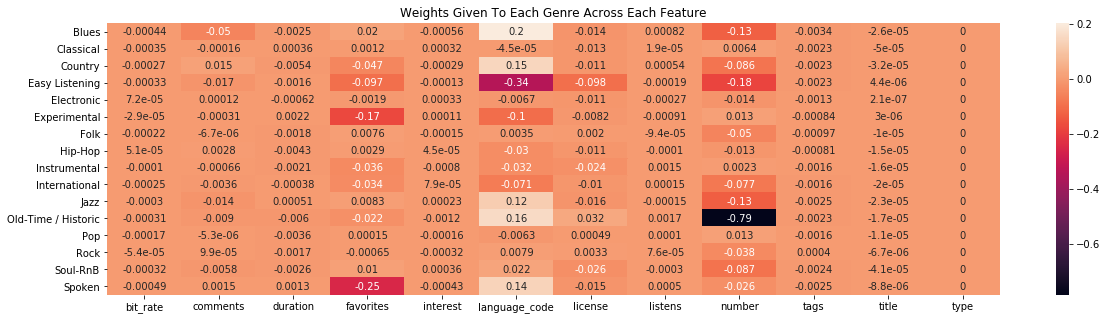

In [353]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame({label: probabilities for label, probabilities in zip(encoder.classes_, classifier.coef_)}, pd.Index(X.columns.values)).T,
    annot=True,
    ax=ax
)

plt.title("Weights Given To Each Genre Across Each Feature")

Text(0.5,1,'Probability Of Each Genre As Predicted By Each Feature')

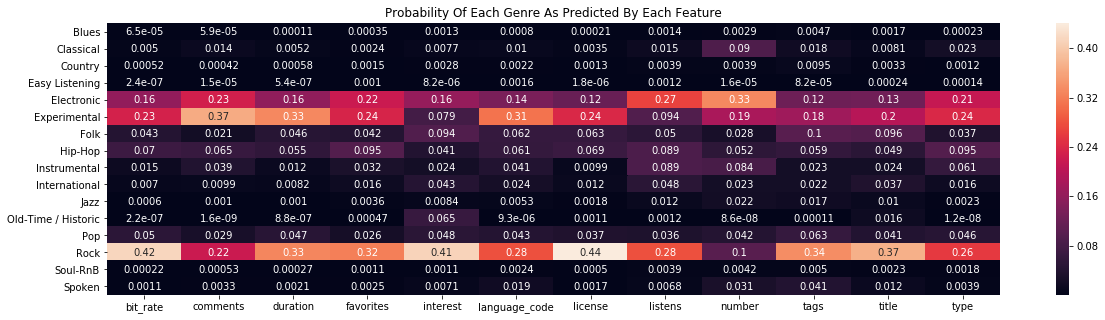

In [436]:
# I notice that the probabilities here largely hold consistent with inspectin the covariances of the weights across each feature
# and how it weights the each class. That across each feature, no one feature consistently predicts every class with to a large
# degree. Some features, for example listens, seems to predict 

fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame(
        {column: probabilities for column, probabilities in zip(X_test.columns.values, classifier.predict_proba(X_test))}, 
        index=pd.Index(encoder.classes_)
    ),
    annot=True,
    ax=ax
)

plt.title("Probability Of Each Genre As Predicted By Each Feature")

Text(0.5,0.98,'Actual Label Frequencies Vs. Classified Label Frequencies')

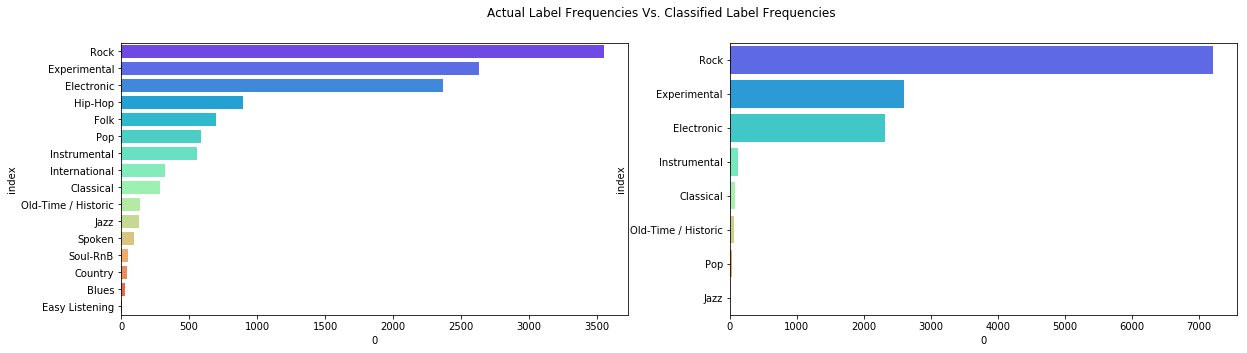

In [404]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(y_test)).value_counts().reset_index(), 
    orient='h', 
    ax=axes[0]
)

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(classifier.predict(X_test))).value_counts().reset_index(), 
    orient='h',
    ax=axes[1]
)

fig.suptitle("Actual Label Frequencies Vs. Classified Label Frequencies")

#### Classify Each Track Genre According To The Artist Metadata Subset

In [33]:
classifier = LogisticRegression(solver='liblinear')

X = artists.apply(preprocessing.LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.35080645161290325

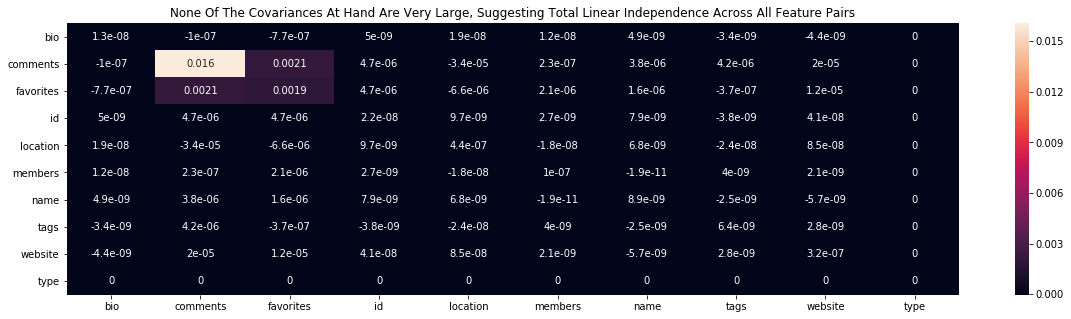

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).cov(), annot=True)

ax.set_title("None Of The Covariances At Hand Are Very Large, Suggesting Total Linear Independence Across All Feature Pairs");

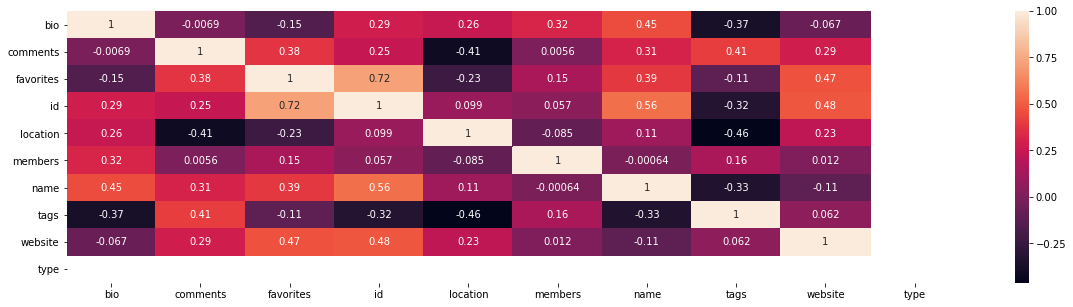

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).corr(), annot=True, ax=ax)

Text(0.5,1,'Weights Given To Each Genre Across Each Feature')

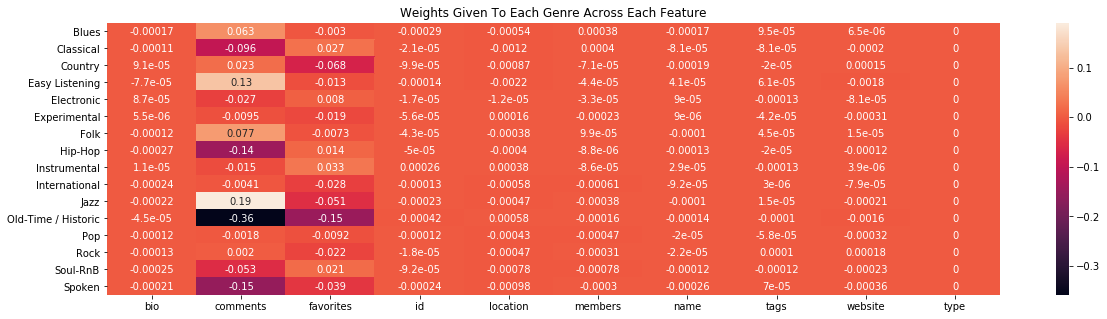

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame({label: probabilities for label, probabilities in zip(encoder.classes_, classifier.coef_)}, pd.Index(X.columns.values)).T,
    annot=True,
    ax=ax
)

plt.title("Weights Given To Each Genre Across Each Feature")

Text(0.5,1,'Probability Of Each Genre As Predicted By Each Feature')

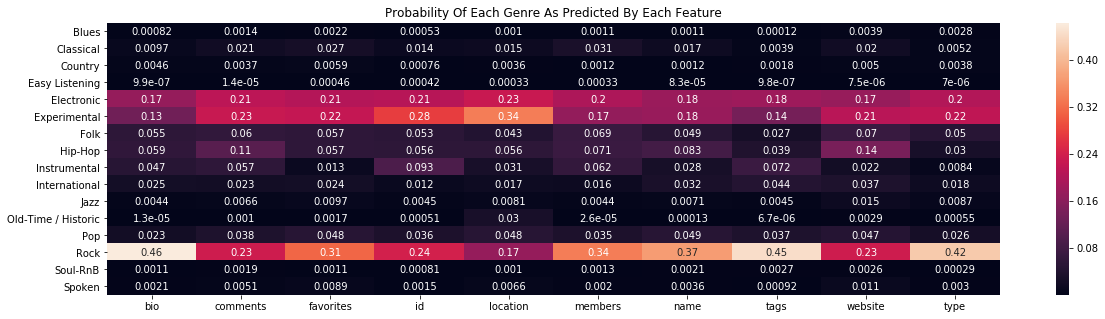

In [37]:
# I notice that the probabilities here largely hold consistent with inspectin the covariances of the weights across each feature
# and how it weights the each class. That across each feature, no one feature consistently predicts every class with to a large
# degree. Some features, for example listens, seems to predict 

fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame(
        {column: probabilities for column, probabilities in zip(X_test.columns.values, classifier.predict_proba(X_test))}, 
        index=pd.Index(encoder.classes_)
    ),
    annot=True,
    ax=ax
)

plt.title("Probability Of Each Genre As Predicted By Each Feature")

Text(0.5,0.98,'Actual Label Frequencies Vs. Classified Label Frequencies')

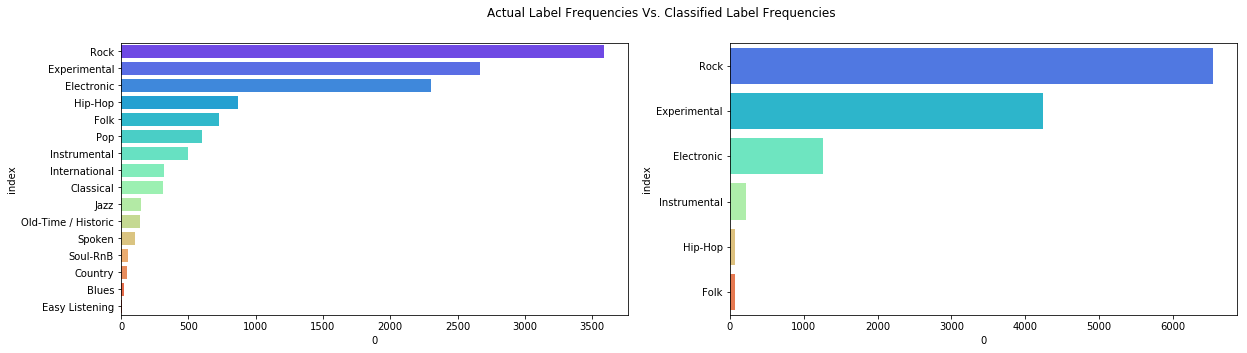

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(y_test)).value_counts().reset_index(), 
    orient='h', 
    ax=axes[0]
)

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(classifier.predict(X_test))).value_counts().reset_index(), 
    orient='h',
    ax=axes[1]
)

fig.suptitle("Actual Label Frequencies Vs. Classified Label Frequencies")

#### Classify Each Track Genre According To The Album Metadata Subset

In [444]:
classifier = LogisticRegression(solver='liblinear')

X = albums.apply(preprocessing.LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.38064516129032255

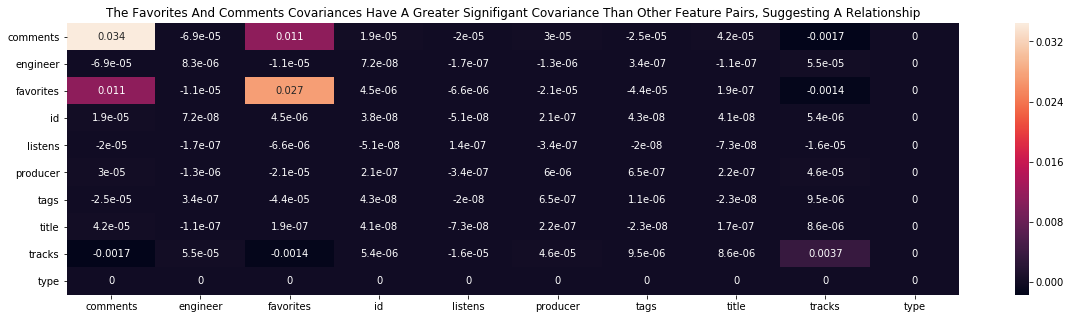

In [452]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).cov(), annot=True)

ax.set_title("The Favorites And Comments Covariances Have A Greater Signifigant Covariance Than Other Feature Pairs, Suggesting A Relationship");

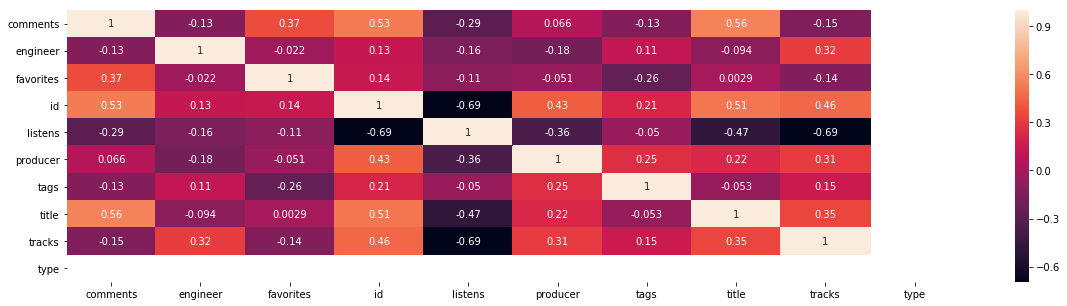

In [446]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).corr(), annot=True, ax=ax)

Text(0.5,1,'Weights Given To Each Genre Across Each Feature')

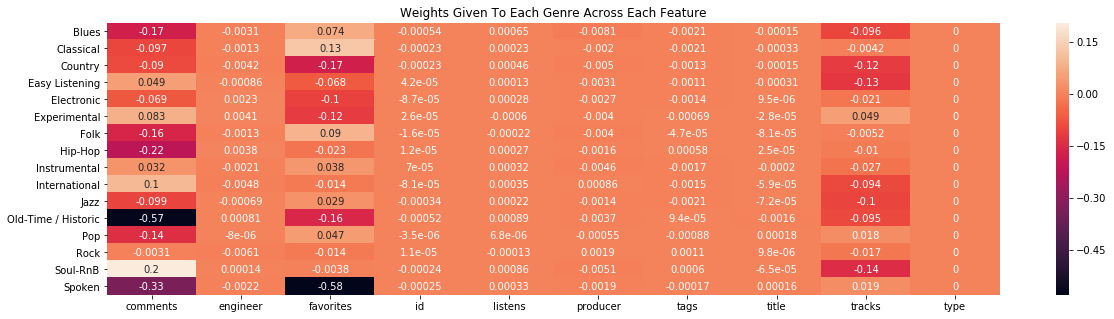

In [447]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame({label: probabilities for label, probabilities in zip(encoder.classes_, classifier.coef_)}, pd.Index(X.columns.values)).T,
    annot=True,
    ax=ax
)

plt.title("Weights Given To Each Genre Across Each Feature")

Text(0.5,1,'Probability Of Each Genre As Predicted By Each Feature')

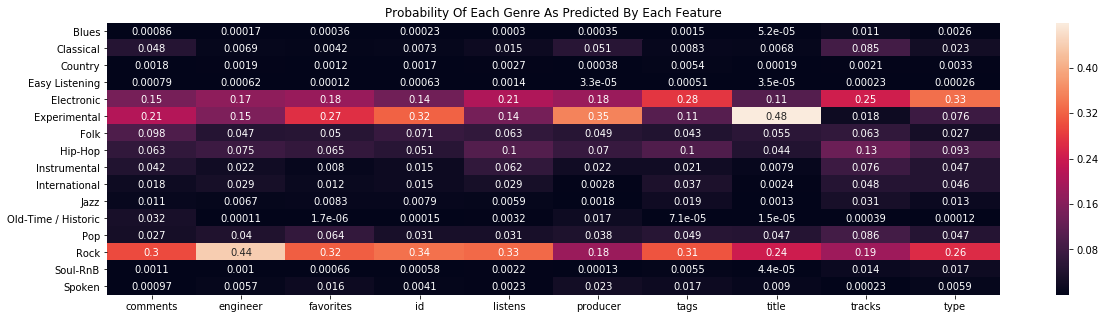

In [448]:
# I notice that the probabilities here largely hold consistent with inspectin the covariances of the weights across each feature
# and how it weights the each class. That across each feature, no one feature consistently predicts every class with to a large
# degree. Some features, for example listens, seems to predict 

fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame(
        {column: probabilities for column, probabilities in zip(X_test.columns.values, classifier.predict_proba(X_test))}, 
        index=pd.Index(encoder.classes_)
    ),
    annot=True,
    ax=ax
)

plt.title("Probability Of Each Genre As Predicted By Each Feature")

Text(0.5,0.98,'Actual Label Frequencies Vs. Classified Label Frequencies')

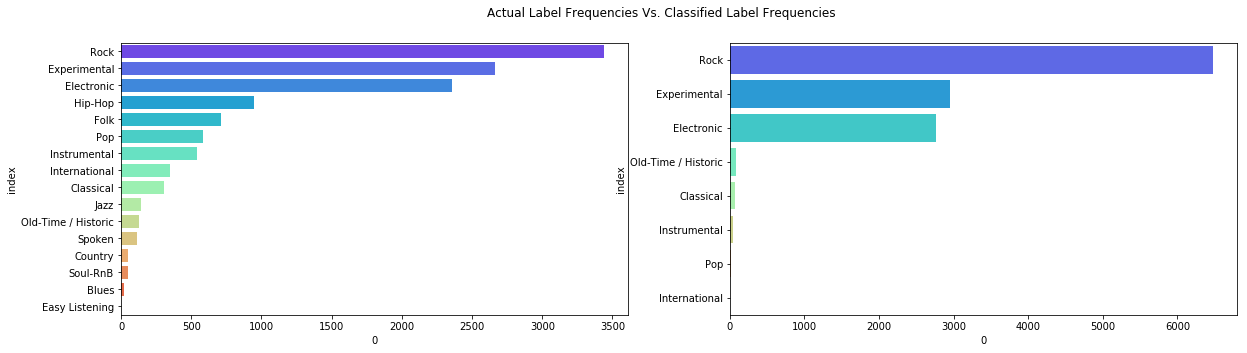

In [449]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(y_test)).value_counts().reset_index(), 
    orient='h', 
    ax=axes[0]
)

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(classifier.predict(X_test))).value_counts().reset_index(), 
    orient='h',
    ax=axes[1]
)

fig.suptitle("Actual Label Frequencies Vs. Classified Label Frequencies")

#### Creating Better Features

##### Artists

In [40]:
artists["bio"] = artists.bio.apply(lambda html: BeautifulSoup(html).text)

In [41]:
artists["tags_count"] = artists.tags.apply(len)
artists["has_tags"] = 0 < artists.tags_count 

In [42]:
artists["members_count"] = artists.members.apply(lambda members: len(members.split(',')))

In [43]:
artists["has_website"] = artists["website"] != "None"

artist_urls = artists.website.apply(urllib.parse.urlparse)
                                    
artists["uses_ssl"] = artist_urls.apply(lambda url: url[0] == "https")
artists["has_soundcloud"] = artist_urls.apply(lambda url: "soundcloud.com" in url[1])
artists["has_blogspot"] = artist_urls.apply(lambda url: "blogspot.com" in url[1])
artists["has_myspace"] = artist_urls.apply(¸lambda url: "myspace.com" in url[1])
artists["has_myspace"] = artist_urls.apply(lambda url: "myspace.com" in url[1])
artists["has_bandcamp"] = artist_urls.apply(lambda url: "bandcamp.com" in url[1])
artists["has_tumblr"] = artist_urls.apply(lambda url: "tumblr.com" in url[1])
artists["has_dot_com"] = artist_urls.apply(lambda url: ".com" in url[1])
artists["has_dot_net"] = artist_urls.apply(lambda url: ".net" in url[1])
artists["has_dot_org"] = artist_urls.apply(lambda url: ".org" in url[1])

##### Albums

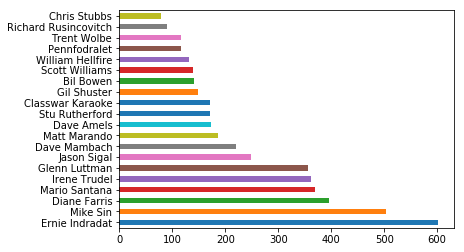

In [44]:
albums.engineer[albums.engineer != 'Unknown'].value_counts()[:20].plot.barh()

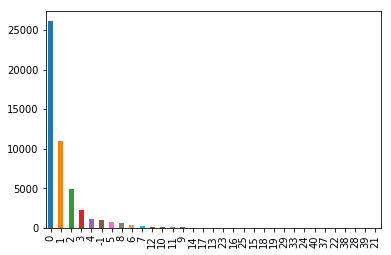

In [66]:
albums.favorites.value_counts().plot.bar()

In [112]:
albums["tags_count"] = albums.tags.apply(len)
albums["producer_count"] = albums.producer.str.split(',').apply(len)
albums["engineer_count"] = albums.engineer.str.split(',').apply(len)
albums["is_live"] = albums.title.apply(lambda title: 'live' in title.lower())
albums["more_than_one_producer"] = albums.producer_count > 1
albums["more_than_one_engineer"] = albums.engineer_count > 1

In [97]:
engineers_by_albums_produced = albums.engineer.value_counts()[1:]
freshman_engineers = engineers_by_albums_produced[engineers_by_albums_produced == 1].index.values
experienced_engineers = engineers_by_albums_produced[engineers_by_albums_produced > engineers_by_albums_produced.mean()].index.values

In [101]:
albums["has_freshman_engineer"] = albums.engineer.isin(freshman_engineers)
albums["has_experienced_engineer"] = albums.engineer.isin(experienced_engineers)

In [102]:
producers_by_albums_produces = albums.producer.value_counts()[1:]
freshman_producers = producers_by_albums_produces[producers_by_albums_produces == 1].index.values
experienced_producers = producers_by_albums_produces[producers_by_albums_produces > producers_by_albums_produces.mean()].index.values

In [103]:
albums["has_freshman_producer"] = albums.producer.isin(freshman_producers)
albums["has_experienced_producer"] = albums.producer.isin(experienced_producers)

In [108]:
albums["above_average_track_count"] = albums.tracks > albums.tracks.mean()

##### Tracks

In [120]:
tracks["tags_count"] = tracks.tags.apply(len)
tracks["genre_count"] = tracks.genres_all.apply(len)
tracks["title_length"] = tracks.title.apply(len)

#### Drop Nascent Features

In [126]:
artists = artists.drop(columns=['type', 'bio', 'location', 'tags'])

In [124]:
albums = albums.drop(columns=['engineer', 'producer', 'title', 'type', 'id'])

In [121]:
tracks = tracks.drop(columns=['title', 'type'])

#### Retrain Models

In [127]:
encoder = preprocessing.LabelEncoder().fit(tracks.genre_top)
y = encoder.transform(tracks.genre_top)

#### Predicting From The Tracks Subset Alone

In [128]:
classifier = LogisticRegression(solver='liblinear')

X = tracks.drop(columns=['genre_top', 'genres', 'genres_all']).apply(preprocessing.LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.43088709677419357

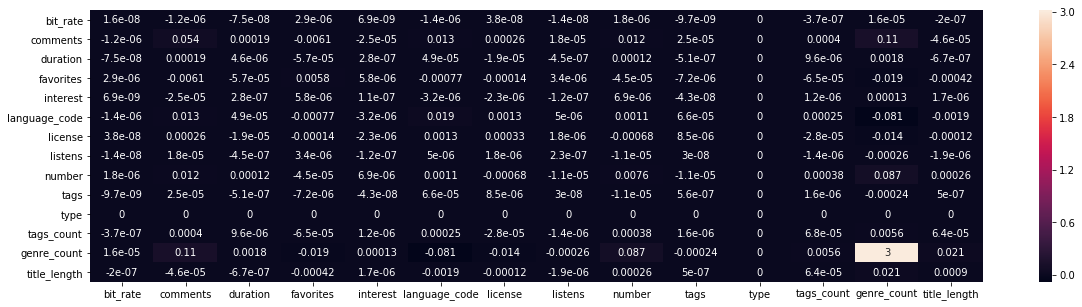

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).cov(), annot=True)

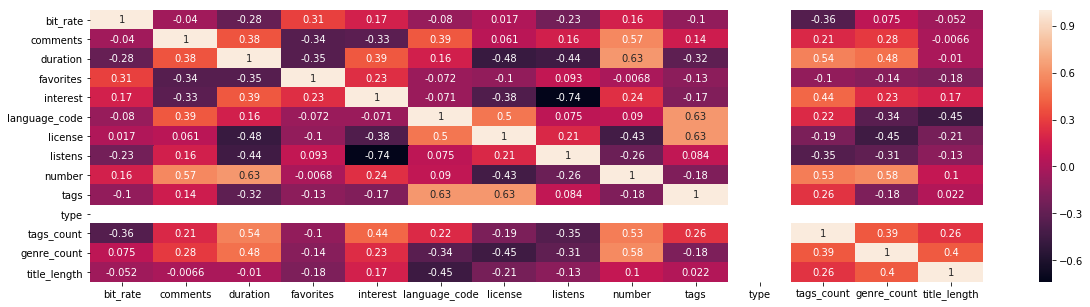

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).corr(), annot=True, ax=ax)

Text(0.5,1,'Weights Given To Each Genre Across Each Feature')

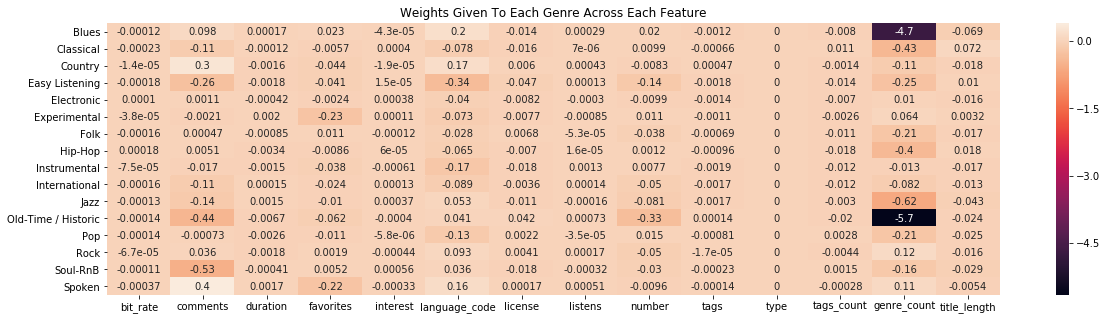

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame({label: probabilities for label, probabilities in zip(encoder.classes_, classifier.coef_)}, pd.Index(X.columns.values)).T,
    annot=True,
    ax=ax
)

plt.title("Weights Given To Each Genre Across Each Feature")

Text(0.5,1,'Probability Of Each Genre As Predicted By Each Feature')

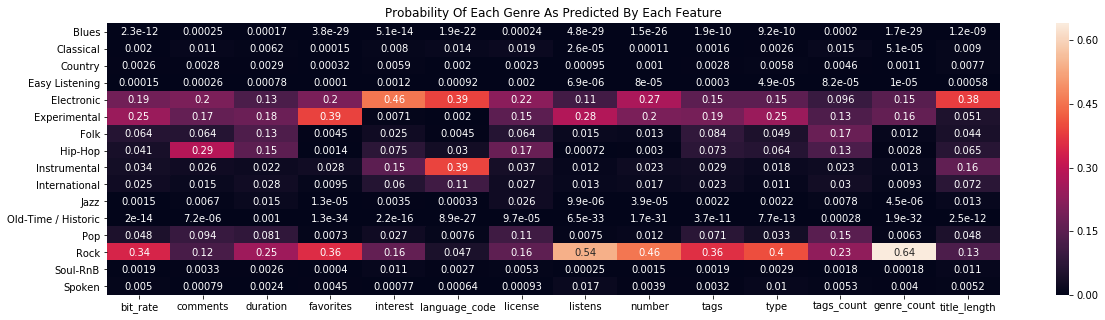

In [132]:
# I notice that the probabilities here largely hold consistent with inspectin the covariances of the weights across each feature
# and how it weights the each class. That across each feature, no one feature consistently predicts every class with to a large
# degree. Some features, for example listens, seems to predict 

fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame(
        {column: probabilities for column, probabilities in zip(X_test.columns.values, classifier.predict_proba(X_test))}, 
        index=pd.Index(encoder.classes_)
    ),
    annot=True,
    ax=ax
)

plt.title("Probability Of Each Genre As Predicted By Each Feature")

Text(0.5,0.98,'Actual Label Frequencies Vs. Classified Label Frequencies')

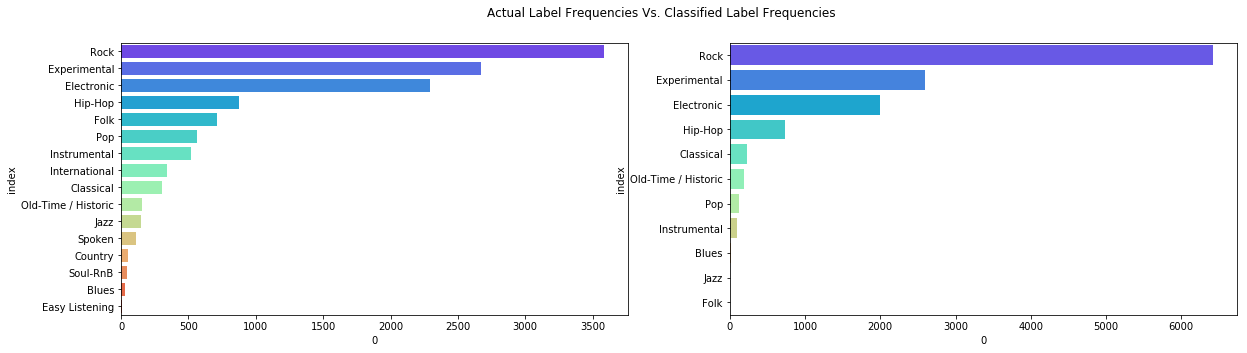

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(y_test)).value_counts().reset_index(), 
    orient='h', 
    ax=axes[0]
)

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(classifier.predict(X_test))).value_counts().reset_index(), 
    orient='h',
    ax=axes[1]
)

fig.suptitle("Actual Label Frequencies Vs. Classified Label Frequencies")

#### Classify Using The Artists Subset Alone

In [134]:
classifier = LogisticRegression(solver='liblinear')

X = artists.apply(preprocessing.LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.37112903225806454

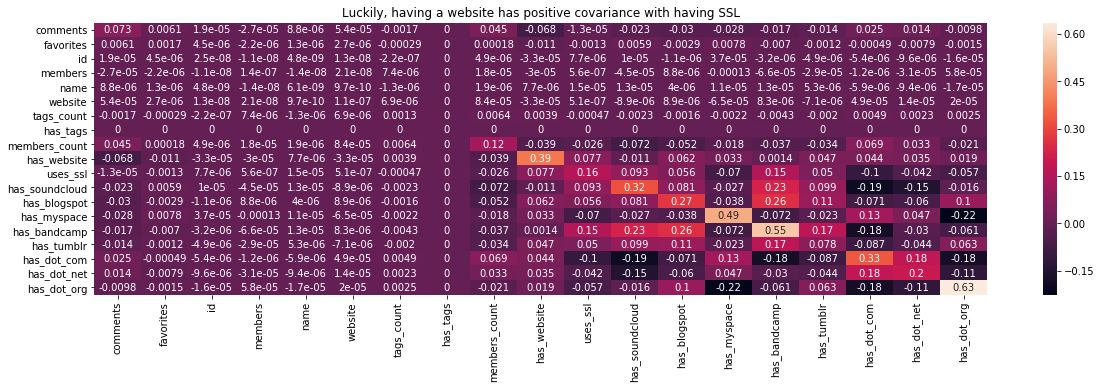

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).cov(), annot=True)

ax.set_title("Luckily, having a website has positive covariance with having SSL");

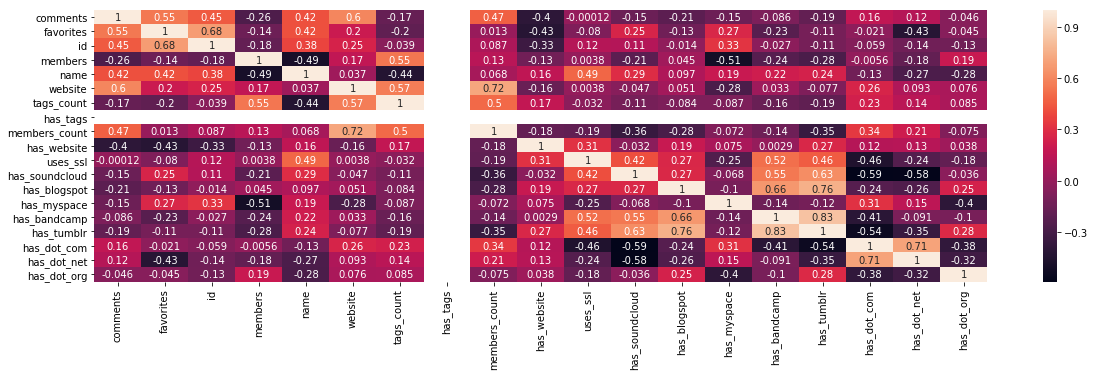

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).corr(), annot=True, ax=ax)

Text(0.5,1,'Proper Data Integrity Is Of Monumental Importance To Pop Artists\nAnd\nPeople Who Like Historic Music Hate Commenting')

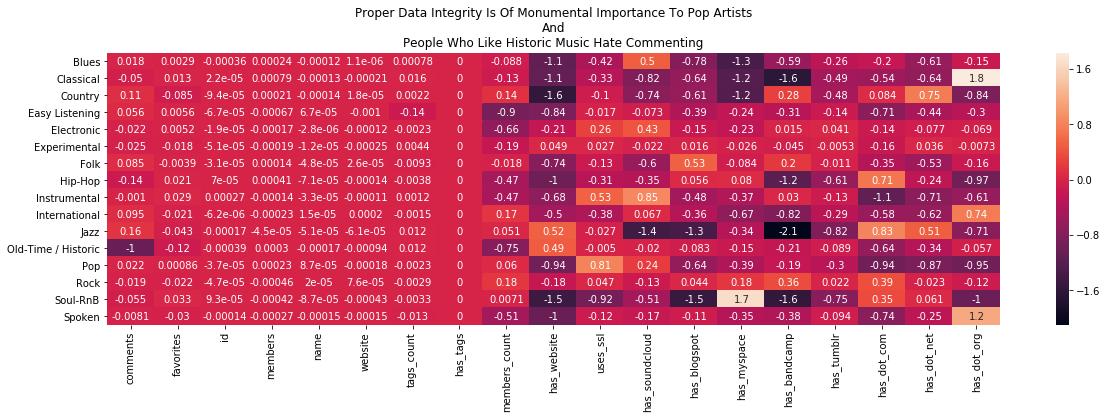

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame({label: probabilities for label, probabilities in zip(encoder.classes_, classifier.coef_)}, pd.Index(X.columns.values)).T,
    annot=True,
    ax=ax
)

plt.title("Proper Data Integrity Is Of Monumental Importance To Pop Artists\nAnd\nPeople Who Like Historic Music Hate Commenting")

Text(0.5,1,'Probability Of Each Genre As Predicted By Each Feature')

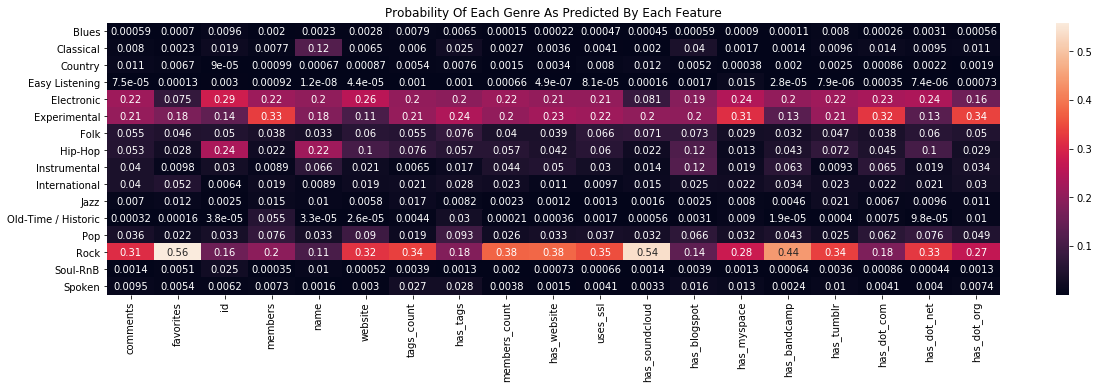

In [146]:
# I notice that the probabilities here largely hold consistent with inspectin the covariances of the weights across each feature
# and how it weights the each class. That across each feature, no one feature consistently predicts every class with to a large
# degree. Some features, for example listens, seems to predict 

fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame(
        {column: probabilities for column, probabilities in zip(X_test.columns.values, classifier.predict_proba(X_test))}, 
        index=pd.Index(encoder.classes_)
    ),
    annot=True,
    ax=ax
)

plt.title("Probability Of Each Genre As Predicted By Each Feature")

Text(0.5,0.98,'Actual Label Frequencies Vs. Classified Label Frequencies')

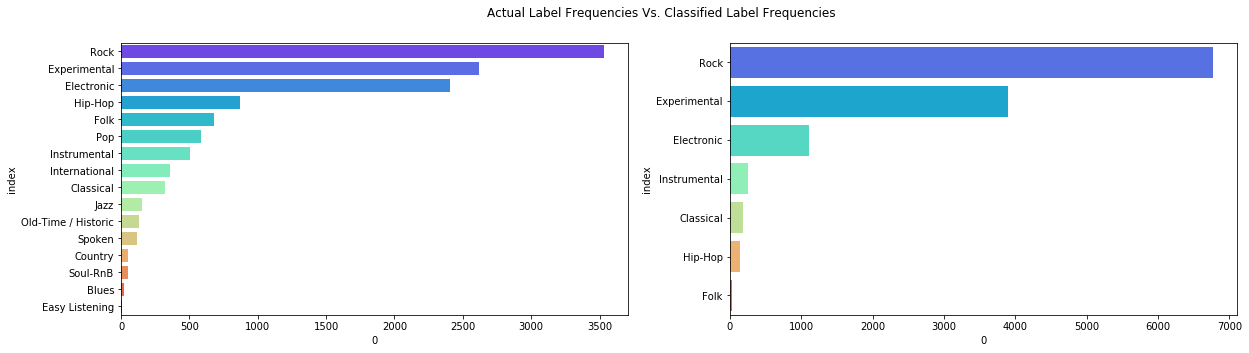

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(y_test)).value_counts().reset_index(), 
    orient='h', 
    ax=axes[0]
)

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(classifier.predict(X_test))).value_counts().reset_index(), 
    orient='h',
    ax=axes[1]
)

fig.suptitle("Actual Label Frequencies Vs. Classified Label Frequencies")

#### Classify Each Track Genre According To The Album Metadata Subset

In [148]:
classifier = LogisticRegression(solver='liblinear')

X = albums.apply(preprocessing.LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.42112903225806453

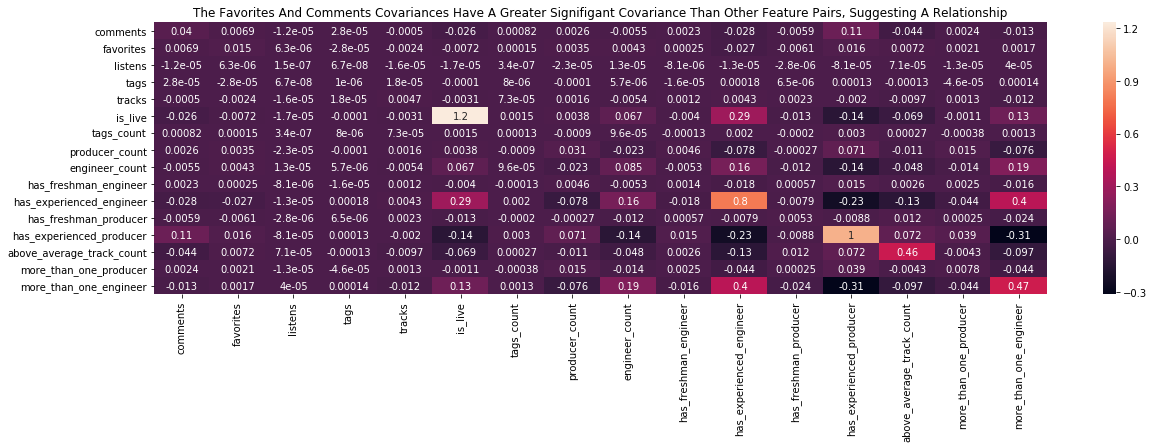

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).cov(), annot=True)

ax.set_title("The Favorites And Comments Covariances Have A Greater Signifigant Covariance Than Other Feature Pairs, Suggesting A Relationship");

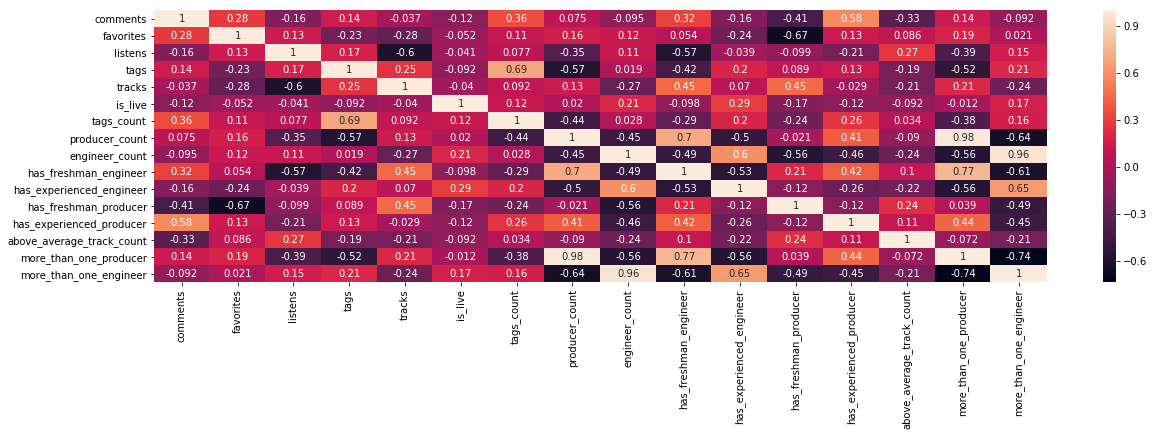

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(pd.DataFrame(classifier.coef_, index=encoder.classes_, columns=pd.Index(X.columns.values)).corr(), annot=True, ax=ax)

Text(0.5,1,'\n\nHaving Experienced Producers Is Predictive Of The Genre Being Soul-RnB\nAnd Having More Than One Engineer Was Predictive Of The Genre Being Country')

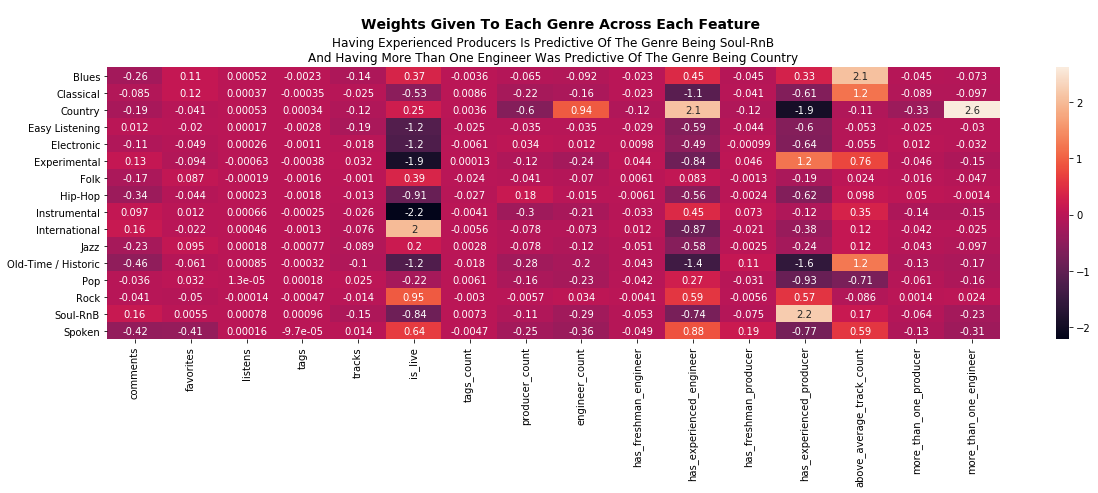

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame({label: probabilities for label, probabilities in zip(encoder.classes_, classifier.coef_)}, pd.Index(X.columns.values)).T,
    annot=True,
    ax=ax
)

fig.suptitle("Weights Given To Each Genre Across Each Feature", fontweight='bold', fontsize=14, x=0.44, y=1, horizontalalignment='center', verticalalignment='center')
plt.title("\n\nHaving Experienced Producers Is Predictive Of The Genre Being Soul-RnB\nAnd Having More Than One Engineer Was Predictive Of The Genre Being Country")

Text(0.5,1,'Probability Of Each Genre As Predicted By Each Feature')

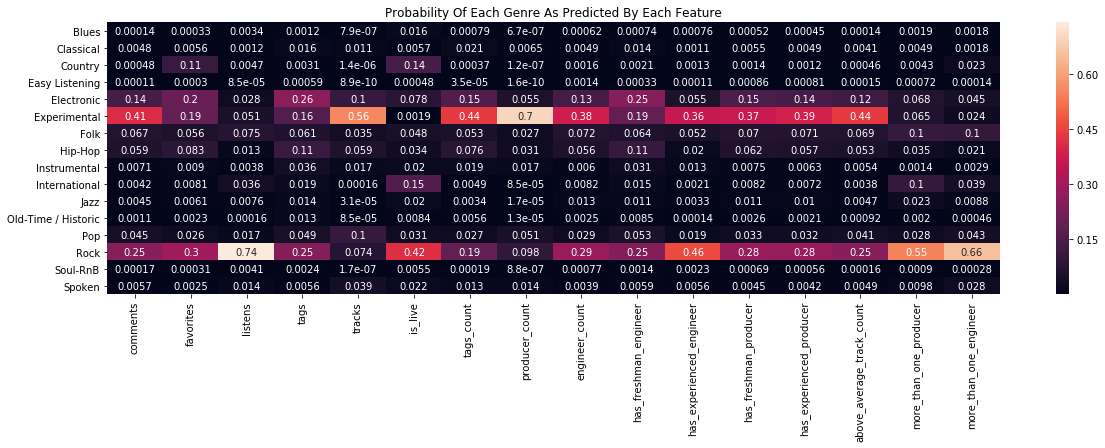

In [152]:
# I notice that the probabilities here largely hold consistent with inspectin the covariances of the weights across each feature
# and how it weights the each class. That across each feature, no one feature consistently predicts every class with to a large
# degree. Some features, for example listens, seems to predict 

fig, ax = plt.subplots(1, 1, figsize=(20,5))

sns.heatmap(
    pd.DataFrame(
        {column: probabilities for column, probabilities in zip(X_test.columns.values, classifier.predict_proba(X_test))}, 
        index=pd.Index(encoder.classes_)
    ),
    annot=True,
    ax=ax
)

plt.title("Probability Of Each Genre As Predicted By Each Feature")

Text(0.5,0.98,'Actual Label Frequencies Vs. Classified Label Frequencies')

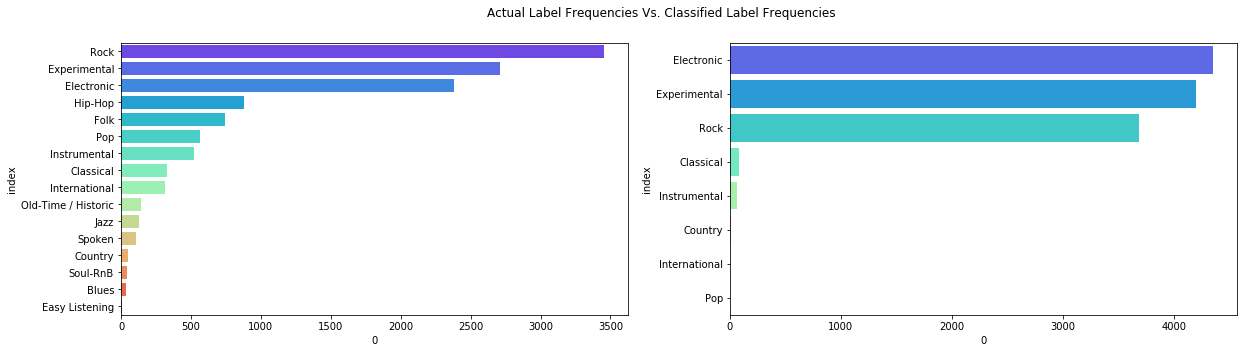

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(y_test)).value_counts().reset_index(), 
    orient='h', 
    ax=axes[0]
)

sns.barplot(
    x=0, 
    y='index', 
    palette='rainbow', 
    data=pd.Series(encoder.inverse_transform(classifier.predict(X_test))).value_counts().reset_index(), 
    orient='h',
    ax=axes[1]
)

fig.suptitle("Actual Label Frequencies Vs. Classified Label Frequencies")

#### PyStan

In [35]:
# Construct input data
data = albums[['comments', 'listens', 'tracks']].copy(deep=True)
data["genre"] = tracks.genre_top

In [36]:
# Labels 
encoder = preprocessing.LabelEncoder().fit(data.genre)
data["genre"]  = encoder.transform(data.genre)

In [38]:
data.to_pickle("albums_genre_data.pkl")

In [229]:
schema = """
    data {
      int K; // number of categories
      int N; // size of training set
      int D; // number of features
      int y[N]; // training labels
      matrix[N, D] x; // training samples
    }

    parameters {
      matrix[D, K] beta;
    }

    model {
      matrix[N, K] x_beta = x * beta;

      to_vector(beta) ~ normal(0, 2);

      for (n in 1:N)
        y[n] ~ categorical_logit(x_beta[n]);
    }
"""

In [56]:
!pip show numpy

Name: numpy
Version: 1.16.2
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: 
Required-by: seaborn, scikit-learn, PyWavelets, patsy, pandas, numexpr, numba, matplotlib, imageio, h5py, bokeh


In [69]:
# model compiled outside of jupyter
beta = pd.read_csv("../../stan_beta.csv").drop(columns='Unnamed: 0')
parameters = pd.read_csv("../../stan_data.csv").drop(columns='Unnamed: 0')

In [72]:
parameters

,alpha,sigma,lp__
0,1.764878,4.672159,-2.132812e+06
1,1.764883,4.679552,-2.117688e+06
2,1.764877,4.672116,-2.132902e+06
3,1.764878,4.679612,-2.117538e+06
4,1.764878,4.672336,-2.132481e+06
5,1.764881,4.679588,-2.117615e+06
6,1.764853,4.658150,-2.161812e+06
7,1.764885,4.679709,-2.117328e+06
8,1.764879,4.672221,-2.132713e+06
9,1.764879,4.672344,-2.132465e+06


#### Response

- I was unable to tease out any one feature which consistently predicted each genre very 
  well, so much as differing features which predicted certain genres but remained agnostic 
  with respect to the rest. Some of the more interesting features I found included the fact
  that usage of SSL on a website correlates well with the genre being Pop. I interpret this
  to mean that Pop has more money and logistics behind it, thus beind able to fund the construction
  of websites by those who take care to include proper security.
- The number of favorites a song receives seems to yield very little insight into the type of 
  genre the music is. This makes sense in so far as there's no reason to expect favorites to
  aggregate to one genre over another by any signifcant margin.
- The most surprising thing was the degree to which having an experience engineer and/or producer
  was predictive, to a significant margin, of a few genres, but all the rest had little to no
  value in the ultimate determination. It'd be interesting to know what causes this, and in the
  future to tease out a feature which explains the diversity of music a given engineer has had
  prior to producing a song.

## Resources and stretch goals

- Check out the other .csv files from the FMA dataset, and see if you can join them or otherwise fit interesting models with them
- [Logistic regression from scratch in numpy](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f) - if you want to dig in a bit more to both the code and math (also takes a gradient descent approach, introducing the logistic loss function)
- Create a visualization to show predictions of your model - ideally show a confidence interval based on error!
- Check out and compare classification models from scikit-learn, such as [SVM](https://scikit-learn.org/stable/modules/svm.html#classification), [decision trees](https://scikit-learn.org/stable/modules/tree.html#classification), and [naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html). The underlying math will vary significantly, but the API (how you write the code) and interpretation will actually be fairly similar.
- Sign up for [Kaggle](https://kaggle.com), and find a competition to try logistic regression with
- (Not logistic regression related) If you enjoyed the assignment, you may want to read up on [music informatics](https://en.wikipedia.org/wiki/Music_informatics), which is how those audio features were actually calculated. The FMA includes the actual raw audio, so (while this is more of a longterm project than a stretch goal, and won't fit in Colab) if you'd like you can check those out and see what sort of deeper analysis you can do.